# Customer Segmentation using K Means Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
df = pd.read_csv(r"C:\Users\idrus\bootup\BootUP-DS-ML\Datasets\Wholesale customers data.csv")
df.shape

(440, 8)

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
df2 = df[['Fresh','Milk']]

In [6]:
df2.head()

,Fresh,Milk
0,12669,9656
1,7057,9810
2,6353,8808
3,13265,1196
4,22615,5410


In [7]:
# applying clustering using kmeans k = 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [8]:
model.cluster_centers_

array([[ 5062.5177305 ,  5973.4964539 ],
       [44622.5625    , 12838.09375   ],
       [19242.69047619,  3611.20634921]])

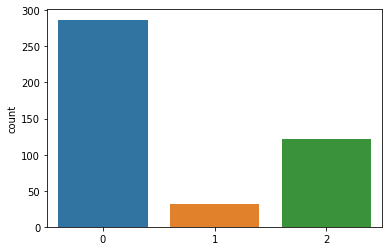

In [9]:
sns.countplot(model.labels_)
plt.show()

C:\Users\idrus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


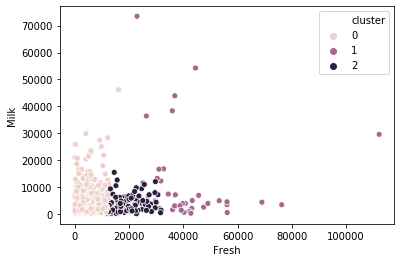

In [10]:
df2['cluster'] = model.labels_
sns.scatterplot(x='Fresh',y='Milk',hue='cluster',data=df2)
plt.show()

In [11]:
df2[df2.cluster==2].max()

Fresh      31812
Milk       15488
cluster        2
dtype: int64

In [12]:
KMeans?

In [13]:
df3 = df[['Fresh','Milk','Frozen','Grocery']]

In [14]:
model2 = KMeans(n_clusters=3,random_state=5)
model2.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [15]:
model2.cluster_centers_

array([[35941.4       ,  6044.45      ,  6713.96666667,  6288.61666667],
       [ 8234.99093656,  3824.33836858,  2568.73716012,  5322.42296073],
       [ 8119.69387755, 18812.93877551,  2011.42857143, 27745.36734694]])

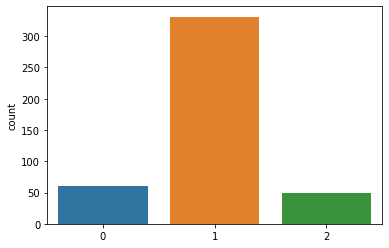

In [16]:
sns.countplot(model2.labels_)
plt.show()

# Elbow method to get the best value of k

In [18]:
k = []
inertia = []
for i in range(1,15):
    k.append(i)
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df2)
    inertia.append(model.inertia_)

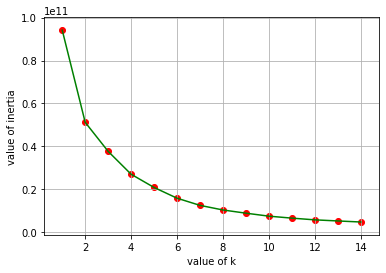

In [19]:
plt.plot(k,inertia,c='g')
plt.scatter(k,inertia,c='r')
plt.grid(True)
plt.xlabel("value of k")
plt.ylabel("value of inertia")
plt.show()

In [21]:
model3 = KMeans(n_clusters=4,random_state=5)
model3.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [23]:
model3.cluster_centers_

array([[5.38701351e+03, 5.68652703e+03, 6.75675676e-02],
       [2.07052759e+04, 4.10867241e+03, 1.95689655e+00],
       [5.00496818e+04, 4.44740909e+03, 1.00000000e+00],
       [3.04450000e+04, 4.87826667e+04, 8.33333333e-01]])